In [ ]:
import pandas as pd
import numpy as np

from scipy import stats

In [ ]:
df =pd.read_excel("AggregateData_New.xlsx",sheet_name='Data')

In [ ]:
df.head()

,dosage_form_code,material_name,cc2_name,cost,quantity,unit_cost,costing_lot_size
0,FCT,ALENDRONATE SDZ 70MG 4FCT HK,Direct Labor,79.271875,2.414312,40.444658,3000
1,FCT,ALENDRONATE SDZ 70MG 4FCT HK,Oth Equ_Buildg Costs,48.414706,0.553471,60.906613,3000
2,FCT,ALENDRONATE SDZ 70MG 4FCT HK,Quality Assurance,531.230000,2.984000,178.026139,3000
3,FCT,ALENDRONATE SDZ 70MG 4FCT MY,Direct Labor,22.112222,0.654667,42.447033,7200
4,FCT,ALENDRONATE SDZ 70MG 4FCT MY,Oth Equ_Buildg Costs,39.299474,0.259368,66.469066,7200


In [ ]:
df.dosage_form_code.value_counts()

FCT    1025
TAB     487
HGC     138
Name: dosage_form_code, dtype: int64

In [ ]:
df.cc2_name.value_counts()

Direct Labor            468
Quality Assurance       468
Oth Equ_Buildg Costs    468
Ecology (ChemO_AI)      123
Utilities (ChemO_AI)    123
Name: cc2_name, dtype: int64

In [ ]:
import re

In [ ]:
df1 =df.copy()

In [ ]:
for i in range(len(df)):
    #print(df.loc[i,'material_name'])
    #print( re.findall('\d+',df.loc[i,'material_name']))
    l1 = re.findall('\d+',df.loc[i,'material_name'])
    df1.loc[i,'material_weight'] = l1[0]
    df1.loc[i,'material_package_size'] = l1[1]

In [ ]:
df1.head()

,dosage_form_code,material_name,cc2_name,cost,quantity,unit_cost,costing_lot_size,material_weight,material_package_size
0,FCT,ALENDRONATE SDZ 70MG 4FCT HK,Direct Labor,79.271875,2.414312,40.444658,3000,70,4
1,FCT,ALENDRONATE SDZ 70MG 4FCT HK,Oth Equ_Buildg Costs,48.414706,0.553471,60.906613,3000,70,4
2,FCT,ALENDRONATE SDZ 70MG 4FCT HK,Quality Assurance,531.230000,2.984000,178.026139,3000,70,4
3,FCT,ALENDRONATE SDZ 70MG 4FCT MY,Direct Labor,22.112222,0.654667,42.447033,7200,70,4
4,FCT,ALENDRONATE SDZ 70MG 4FCT MY,Oth Equ_Buildg Costs,39.299474,0.259368,66.469066,7200,70,4


In [ ]:
df1.columns

Index(['dosage_form_code', 'material_name', 'cc2_name', 'cost', 'quantity',
       'unit_cost', 'costing_lot_size', 'material_weight',
       'material_package_size'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dosage_form_code       1650 non-null   object 
 1   material_name          1650 non-null   object 
 2   cc2_name               1650 non-null   object 
 3   cost                   1650 non-null   float64
 4   quantity               1650 non-null   float64
 5   unit_cost              1650 non-null   float64
 6   costing_lot_size       1650 non-null   int64  
 7   material_weight        1650 non-null   object 
 8   material_package_size  1650 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 116.1+ KB


In [ ]:
df1["material_weight"] = pd.to_numeric(df1["material_weight"])
df1["material_package_size"] = pd.to_numeric(df1["material_package_size"])

In [ ]:
df1['dosage_form_code'].value_counts()

FCT    1025
TAB     487
HGC     138
Name: dosage_form_code, dtype: int64

In [ ]:
df1['cc2_name'].value_counts()

Direct Labor            468
Quality Assurance       468
Oth Equ_Buildg Costs    468
Ecology (ChemO_AI)      123
Utilities (ChemO_AI)    123
Name: cc2_name, dtype: int64

In [ ]:
df.describe()

,cost,quantity,unit_cost,costing_lot_size
count,1650.000000,1650.000000,1650.000000,1.650000e+03
mean,405.201485,49.432948,76.874147,5.781539e+04
std,666.587480,192.011251,61.069737,2.555335e+05
min,0.020000,0.022000,0.909091,1.000000e+02
25%,50.704667,1.311212,41.168255,3.000000e+03
50%,141.141208,2.984750,54.212580,8.000000e+03
75%,468.244500,7.112750,137.409373,2.600000e+04
max,7654.410000,2901.122667,178.038687,3.165000e+06


# EDA

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# For Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [ ]:
print('Data Shape:', df1.shape)

Data Shape: (1650, 9)


What is the average cost of 'dosage_form_code'?

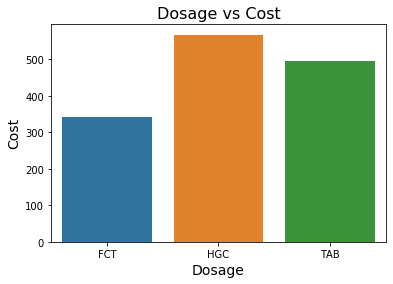

In [ ]:
data2 = pd.DataFrame(df1.groupby(['dosage_form_code'], as_index = False)['cost'].mean())
plt.figure(figsize = [6, 4])
sns.barplot(x = 'dosage_form_code', y = 'cost', data = data2, linewidth = 2.5)
plt.xlabel('Dosage', size = 14)
plt.ylabel('Cost', size = 14)
plt.title('Dosage vs Cost', size = 16)
plt.show()


What is the average cost of 'cc2_name'?

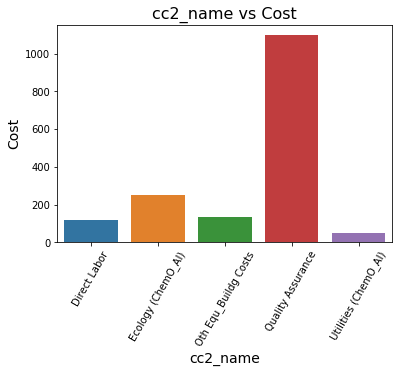

In [ ]:
data2 = pd.DataFrame(df1.groupby(['cc2_name'], as_index = False)['cost'].mean())
plt.figure(figsize = [6, 4])
sns.barplot(x = 'cc2_name', y = 'cost', data = data2, linewidth = 2.5)
plt.xlabel('cc2_name', size = 14)
plt.ylabel('Cost', size = 14)
plt.xticks(rotation=60)
plt.title('cc2_name vs Cost', size = 16)
plt.show()

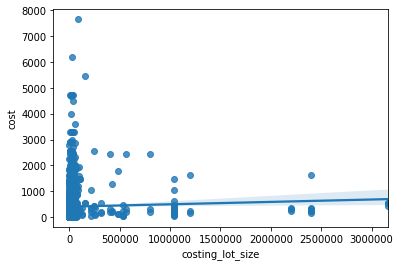

In [ ]:
sns.regplot(x="costing_lot_size",y="cost",data=df1)

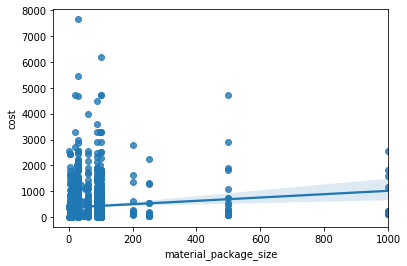

In [ ]:
sns.regplot(x="material_package_size",y="cost",data=df1)

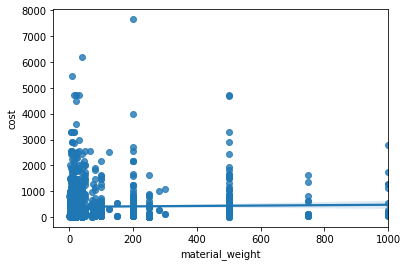

In [ ]:
sns.regplot(x="material_weight",y="cost",data=df1)

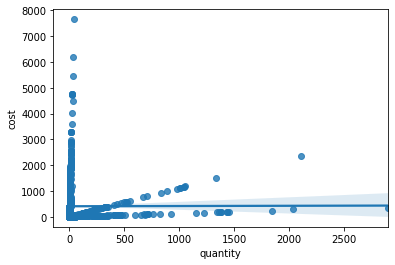

In [ ]:
sns.regplot(x="quantity",y="cost",data=df)

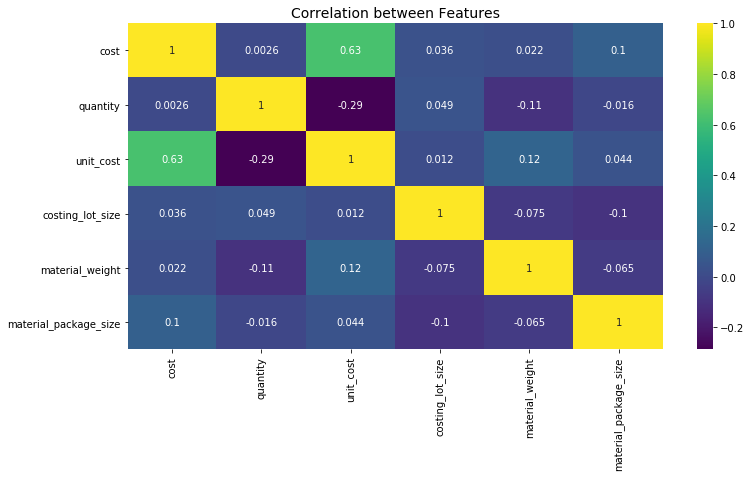

In [ ]:
figure = plt.figure(figsize = [12, 6])
sns.heatmap(df1.corr(), annot = True, cmap = 'viridis')
plt.title('Correlation between Features', size = 14)
plt.show()

Feature encoding

In [ ]:
df1 = pd.get_dummies(data = df1, columns = ['dosage_form_code','cc2_name'])
print('Data Shape:', df1.shape)
df1.head()

Data Shape: (1650, 15)


,material_name,cost,quantity,unit_cost,costing_lot_size,material_weight,material_package_size,dosage_form_code_FCT,dosage_form_code_HGC,dosage_form_code_TAB,cc2_name_Direct Labor,cc2_name_Ecology (ChemO_AI),cc2_name_Oth Equ_Buildg Costs,cc2_name_Quality Assurance,cc2_name_Utilities (ChemO_AI)
0,ALENDRONATE SDZ 70MG 4FCT HK,79.271875,2.414312,40.444658,3000,70,4,1,0,0,1,0,0,0,0
1,ALENDRONATE SDZ 70MG 4FCT HK,48.414706,0.553471,60.906613,3000,70,4,1,0,0,0,0,1,0,0
2,ALENDRONATE SDZ 70MG 4FCT HK,531.230000,2.984000,178.026139,3000,70,4,1,0,0,0,0,0,1,0
3,ALENDRONATE SDZ 70MG 4FCT MY,22.112222,0.654667,42.447033,7200,70,4,1,0,0,1,0,0,0,0
4,ALENDRONATE SDZ 70MG 4FCT MY,39.299474,0.259368,66.469066,7200,70,4,1,0,0,0,0,1,0,0


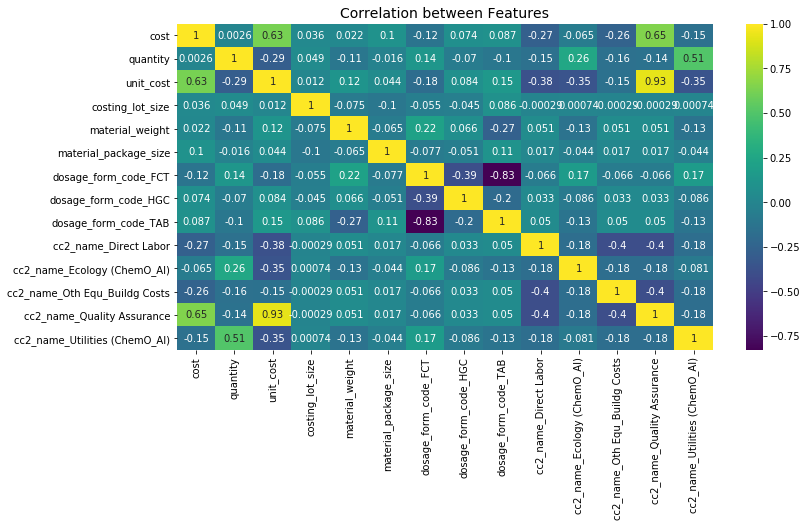

In [ ]:
figure = plt.figure(figsize = [12, 6])
sns.heatmap(df1.corr(), annot = True, cmap = 'viridis')
plt.title('Correlation between Features', size = 14)
plt.show()

In [ ]:
df1.head()

,material_name,cost,quantity,unit_cost,costing_lot_size,material_weight,material_package_size,dosage_form_code_FCT,dosage_form_code_HGC,dosage_form_code_TAB,cc2_name_Direct Labor,cc2_name_Ecology (ChemO_AI),cc2_name_Oth Equ_Buildg Costs,cc2_name_Quality Assurance,cc2_name_Utilities (ChemO_AI)
0,ALENDRONATE SDZ 70MG 4FCT HK,79.271875,2.414312,40.444658,3000,70,4,1,0,0,1,0,0,0,0
1,ALENDRONATE SDZ 70MG 4FCT HK,48.414706,0.553471,60.906613,3000,70,4,1,0,0,0,0,1,0,0
2,ALENDRONATE SDZ 70MG 4FCT HK,531.230000,2.984000,178.026139,3000,70,4,1,0,0,0,0,0,1,0
3,ALENDRONATE SDZ 70MG 4FCT MY,22.112222,0.654667,42.447033,7200,70,4,1,0,0,1,0,0,0,0
4,ALENDRONATE SDZ 70MG 4FCT MY,39.299474,0.259368,66.469066,7200,70,4,1,0,0,0,0,1,0,0


# Modeling

In [ ]:
X = df1.drop(['material_name','cost','unit_cost'], axis = 1)
y = df1['cost']

In [ ]:
print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (1650, 12)
y Shape: (1650,)


In [ ]:
from sklearn.feature_selection import SelectFromModel
# For metrics evaluation
from sklearn.metrics import mean_squared_error, r2_score
# For Data Modeling and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# Feature Selection

Feature Selection using Random Forest

In [ ]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print('Total Features Selected are', len(selected_feat))
print('Features:', selected_feat)

NameError: name 'X_train' is not defined

Pearson Correlation

In [ ]:
ls = ['quantity', 'costing_lot_size', 'material_weight', 'material_package_size']
correlation = pd.DataFrame(np.abs([stats.pearsonr(df1[i], df1['cost']) for i in ls]), index = ls, columns = ['Pearson Coef.', 'p-value'])
correlation.transpose()

Observation : It comes out only potential feature in numerical predictor is 'material_package_size' as showing ~10% of dependency on target feature with p-value ~ 0.

#ANOVA (Analysis of Variance)
----ANOVA is used when there is one categorical feature and one numerical feature

ANOVA on "dosage_form_code"

In [ ]:
df.dosage_form_code.value_counts()

In [ ]:
grouped_test = df[['dosage_form_code', 'cost']].groupby(['dosage_form_code'])
F_score, p_value = stats.f_oneway(grouped_test.get_group('FCT')['cost'],
                                  grouped_test.get_group('TAB')['cost'],
                                  grouped_test.get_group('HGC')['cost'])
print('F-Score:', F_score, 'p-value:', p_value)

ANOVA on "cc2_name"

In [ ]:
df.cc2_name.value_counts()

In [ ]:
grouped_test = df[['cc2_name', 'cost']].groupby(['cc2_name'])
F_score, p_value = stats.f_oneway(grouped_test.get_group('Oth Equ_Buildg Costs')['cost'],
                                  grouped_test.get_group('Direct Labor')['cost'],
                                  grouped_test.get_group('Quality Assurance')['cost'],
                                  grouped_test.get_group('Ecology (ChemO_AI)')['cost'],
                                  grouped_test.get_group('Utilities (ChemO_AI)')['cost'])
print('F-Score:', F_score, 'p-value:', p_value)

Observation:
Using ANOVA we found that 'dosage_form_code' and 'cc2_name' features are really good predictors for 'cost' feature as their F-score is high and p-value is low.

# Model Building

In [ ]:
X = df1.drop(['material_name','cost','unit_cost'], axis = 1)
y = df1['cost']

In [ ]:
print('X Shape:', X.shape)
print('y Shape:', y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
def PlotScore(y_train, y_train_pred, y_test, y_test_pred):
  '''
  Plot visual of acutal and predicted for train & test data
  y_train: actual values of y train
  y_train_pred: predicted values of y_train
  y_test: actual values of y_test
  y_test_pred: predicted values of y_test
  '''
  plt.figure(figsize = [13.66, 6])
  plt.subplot(1, 2, 1)
  sns.lineplot(x = y_train, y = y_train_pred, marker = 'o')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('For Train Data')

  plt.subplot(1, 2, 2)
  sns.lineplot(x = y_test, y = y_test_pred, marker = 'o')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('For Test Data')
  plt.show()

Linear Regression

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = np.abs(model.predict(X_train).astype('int'))
y_test_pred = np.abs(model.predict(X_test).astype('int'))

print('Acutal Values:', y_test[0:5])
print('Predicted Values:', y_test_pred[0:5])
# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))
# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(model.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(model.score(X_test, y_test), decimals = 2)*100, '%')
# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

RandomForest Regressor

In [ ]:
randomforest = RandomForestRegressor(random_state = 42)
randomforest.fit(X_train, y_train)
y_train_pred = np.abs(randomforest.predict(X_train).astype('int'))
y_test_pred = np.abs(randomforest.predict(X_test).astype('int'))

print('Acutal Values:', y_test[0:5])
print('Predicted Values:', y_test_pred[0:5])
# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))
# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(randomforest.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(randomforest.score(X_test, y_test), decimals = 2)*100, '%')
# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)


GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

y_train_pred = np.abs(gbr.predict(X_train).astype('int'))
y_test_pred = np.abs(gbr.predict(X_test).astype('int'))

print('Acutal Values:', y_test[0:5])
print('Predicted Values:', y_test_pred[0:5])
# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))
# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(gbr.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(gbr.score(X_test, y_test), decimals = 2)*100, '%')
# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:
#prediction

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
input = [[10,50000,100,30,1,0,0,0,0,1,0,0]] #  tulip 100mg 30 fct , 50000 , 40 mg 30 fct

In [ ]:
pred = randomforest.predict(input)
pred

TULIP 10MG 30FCT BY

In [ ]:
X.head(2)

In [ ]:
tulip_1 = [[0.99752,6000,10,30,1,0,0,1,0,0,0,0]]
tulip_pred1 = randomforest.predict(tulip_1)
tulip_pred1

In [ ]:
tulip_2 = [[37.647,6000,10,30,1,0,0,0,1,0,0,0]]
tulip_pred2 = randomforest.predict(tulip_2)
tulip_pred2

In [ ]:
tulip_3 = [[0.470807692,6000,10,30,1,0,0,0,0,1,0,0]]
tulip_pred3 = randomforest.predict(tulip_3)
tulip_pred3

In [ ]:
tulip_4 = [[1.6985,6000,10,30,1,0,0,0,0,0,1,0]]
tulip_pred4 = randomforest.predict(tulip_4)
tulip_pred4

In [ ]:
tulip_5 = [[51.86033333,6000,10,30,1,0,0,0,0,0,0,1]]
tulip_pred5 = randomforest.predict(tulip_5)
tulip_pred5

Unknown datapoints  : Tulip 40 mg 90 fct , lot size 10000, quantity 10

In [ ]:
tulip_new_1 = [[10,10000,40,90,1,0,0,1,0,0,0,0]]
tulip_new_pred1 = randomforest.predict(tulip_new_1)
tulip_new_pred1

In [ ]:
tulip_new_2 = [[10,10000,40,90,1,0,0,0,1,0,0,0]]
tulip_new_pred2 = randomforest.predict(tulip_new_2)
tulip_new_pred2

In [ ]:
tulip_new_3 = [[10,10000,40,90,1,0,0,0,0,1,0,0]]
tulip_new_pred3 = randomforest.predict(tulip_new_3)
tulip_new_pred3

In [ ]:
tulip_new_4 = [[10,10000,40,90,1,0,0,0,0,0,1,0]]
tulip_new_pred4 = randomforest.predict(tulip_new_4)
tulip_new_pred4

In [ ]:
tulip_new_5 = [[10,10000,40,90,1,0,0,0,0,0,0,1]]
tulip_new_pred5 = randomforest.predict(tulip_new_5)
tulip_new_pred5

In [ ]:
total_sum = tulip_new_pred1+tulip_new_pred2+tulip_new_pred3+tulip_new_pred4+tulip_new_pred5
total_sum

Unknown datapoints  : Tulip 20 mg 40 fct , lot size 20000, quantity 5

In [ ]:
tulip_new_1 = [[5,20000,20,40,1,0,0,1,0,0,0,0]]
tulip_new_pred1 = randomforest.predict(tulip_new_1)
tulip_new_pred1

In [ ]:
tulip_new_2 = [[5,20000,20,40,1,0,0,0,1,0,0,0]]
tulip_new_pred2 = randomforest.predict(tulip_new_2)
tulip_new_pred2

In [ ]:
tulip_new_3 = [[5,20000,20,40,1,0,0,0,0,1,0,0]]
tulip_new_pred3 = randomforest.predict(tulip_new_3)
tulip_new_pred3

In [ ]:
tulip_new_4 = [[5,20000,20,40,1,0,0,0,0,0,1,0]]
tulip_new_pred4 = randomforest.predict(tulip_new_4)
tulip_new_pred4

In [ ]:
tulip_new_5 = [[5,20000,20,40,1,0,0,0,0,0,0,1]]
tulip_new_pred5 = randomforest.predict(tulip_new_5)
tulip_new_pred5

In [ ]:
total_sum_1 = tulip_new_pred1+tulip_new_pred2+tulip_new_pred3+tulip_new_pred4+tulip_new_pred5
total_sum_1